###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [2]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

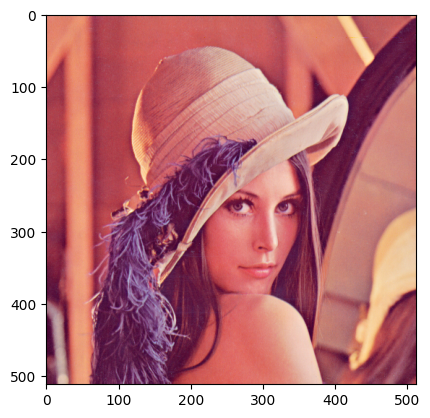

In [3]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [5]:
h,w,c = image.shape  #height, width, channels of the image
print(h,w,c)

512 512 3


In [6]:
print(f"height of the image is {h} and the width is {w}")

height of the image is 512 and the width is 512


In [7]:
print(f"number of channels in the image is {c}") #number of channels in the image
print(f"The intensity values of the image are in the range {image.min()} to {image.max()}") #Intensity values of the image
print(f"aspect ratio = {w/h}") #Aspect ratio = width/height

number of channels in the image is 3
The intensity values of the image are in the range 0.0117647061124444 to 1.0
aspect ratio = 1.0


###### Task1.2:  Visualization of each channel

In [5]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here
    
    output = image[:,:, channel]
    
    return output    # 'output' is image's particular channel values

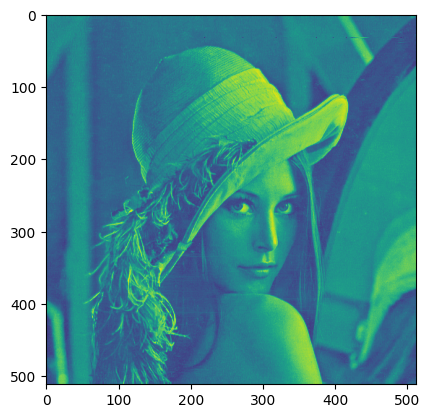

In [6]:
plt.imshow(VisualizeChannel(image,2))

In [9]:
r_min, r_max = np.min(image[:,:,0]), np.max(image[:,:,0])  # min and max values of red channel
g_min, g_max = np.min(image[:,:,1]), np.max(image[:,:,1])  # min and max values of green channel
b_min, b_max = np.min(image[:,:,2]), np.max(image[:,:,2])  # min and max values of blue channel



In [10]:
print(f"The intensity range for red color is from {r_min} to {r_max})")
print(f"The intensity range for green color is from {g_min} to {g_max})")
print(f"The intensity range for blue color is from {b_min} to {b_max})")

The intensity range for red color is from 0.21176470816135406 to 1.0)
The intensity range for green color is from 0.0117647061124444 to 0.9725490212440491)
The intensity range for blue color is from 0.0313725508749485 to 0.8823529481887817)


# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

In [6]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = image[:,:,0]*0.299 + image[:,:,1]*0.587 + image[:,:,2]*0.114  # Gray = 0.299 * Red + 0.587 * Green + 0.114 * Blue

    return gray       #'gray' is grayscale image, converted from RGB image

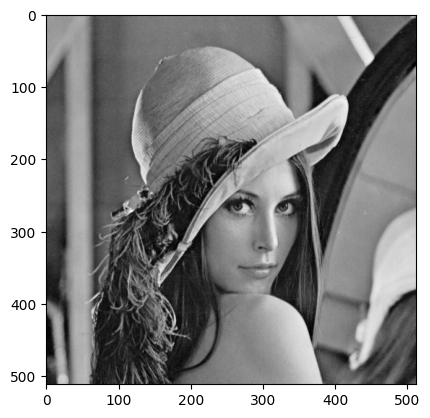

In [7]:
plt.imshow(RGB2Gray(image), cmap='gray')  # Visualizing the grayscale image

###### Task2.2 : Gray to Binary

In [9]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray_image = RGB2Gray(image)

    



    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bin_image = np.zeros(gray_image.shape, dtype=np.uint8)  # Initialization of the binary image with zeros
    bin_image[gray_image >= T] = 255  # Set pixels greater than or equal to T to 255 (white)
    bin_image[gray_image < T] = 0     # Set pixels less than T


    #write code to visualize the resultant image


    return bin_image


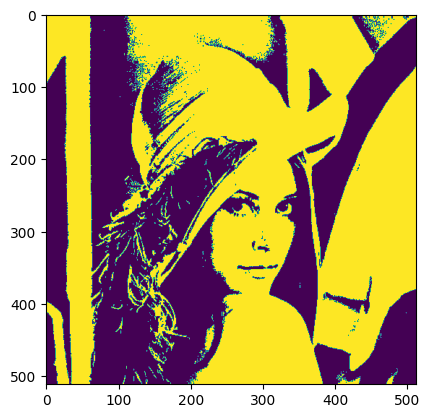

In [ ]:
plt.imshow(Gray2Binary(image, 0.47))  # Visualizing the binary image with threshold 128

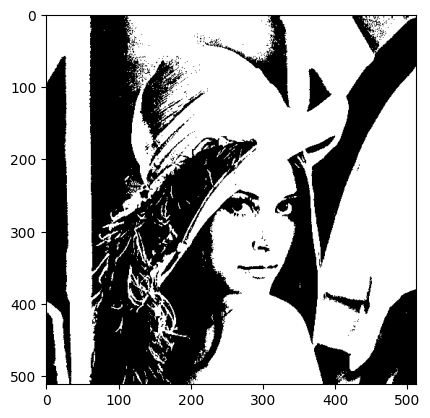

In [21]:
plt.imshow(Gray2Binary(image, 0.47), cmap = 'gray') 

######  Task2.3:  Crop a 5*5 section of a gray image

In [27]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    Flag  = len(image.shape)
    if Flag == 3:  # RGB image
        image = RGB2Gray(image)  # Convert to gray



    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = image[r0:r0+5, c0:c0+5]  # Extracting the 5x5 patch from the image using slicing


    # visualize patch and print its value
    plt.imshow(patch, cmap='gray')  # Visualizing the patch
    print(f"Patch values:{patch}")  # Printing the patch values

    return patch

Patch values:[[0.40591767 0.3780157  0.39881963 0.39800784 0.38228238]
 [0.36188236 0.39344707 0.40043923 0.39894903 0.40365884]
 [0.3856471  0.3850902  0.39065886 0.3900157  0.4074275 ]
 [0.38034117 0.38709807 0.39295685 0.38541177 0.39400393]
 [0.36584708 0.39008236 0.38973728 0.38189414 0.40323138]]


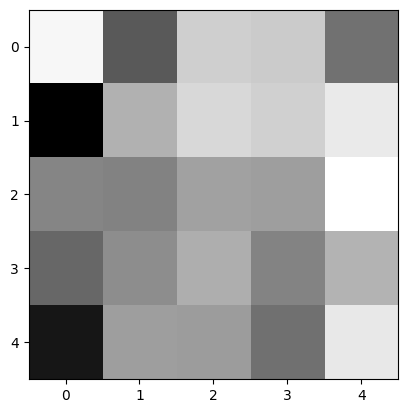

In [28]:
plt.imshow(ImageCrop(image, 150, 100), cmap='gray')  

###### Task2.4: Uniform Brightness Scaling

In [30]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    scaled_img = image * scale  # Scaling the pixel values by the given factor


    #display the resultant image
    plt.imshow(scaled_img)  # Visualizing the scaled image


    return scaled_img       #replace output with the variable name you used for final result


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01764706..1.5].


array([[[1.3294117 , 0.8058824 , 0.7352941 ],
        [1.3294117 , 0.8058824 , 0.7352941 ],
        [1.3117647 , 0.8058824 , 0.782353  ],
        ...,
        [1.3529412 , 0.8705883 , 0.7176471 ],
        [1.3       , 0.7647059 , 0.64705884],
        [1.1764706 , 0.58235294, 0.5294118 ]],

       [[1.3294117 , 0.8058824 , 0.7352941 ],
        [1.3294117 , 0.8058824 , 0.7352941 ],
        [1.3117647 , 0.8058824 , 0.782353  ],
        ...,
        [1.3529412 , 0.8705883 , 0.7176471 ],
        [1.3       , 0.7647059 , 0.64705884],
        [1.1764706 , 0.58235294, 0.5294118 ]],

       [[1.3294117 , 0.8058824 , 0.7352941 ],
        [1.3294117 , 0.8058824 , 0.7352941 ],
        [1.3117647 , 0.8058824 , 0.782353  ],
        ...,
        [1.3529412 , 0.8705883 , 0.7176471 ],
        [1.3       , 0.7647059 , 0.64705884],
        [1.1764706 , 0.58235294, 0.5294118 ]],

       ...,

       [[0.49411768, 0.10588236, 0.3529412 ],
        [0.49411768, 0.10588236, 0.3529412 ],
        [0.5411765 , 0

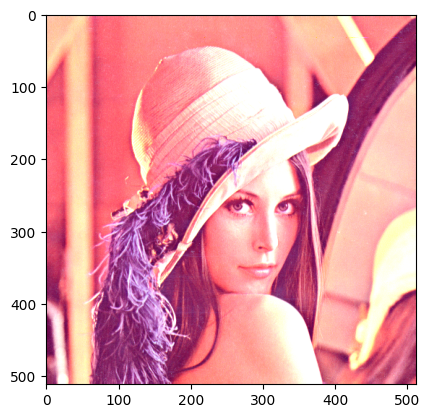

In [31]:
UniformBrightScaling(image, 1.5)  

In [9]:
## Image normalization

# 3. Image Filtering

In [32]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        image = RGB2Gray(image)

    r, c = image.shape  # Get the dimensions of the gray image
    output = np.zeros((r, c), dtype=np.float32)  


    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    pad_img = np.zeros((r + 2, c + 2), dtype=np.float32)  # Padding the image with zeros


    #now copy gray image to above created array at location starting from (1,1)
    pad_img[1:r+1, 1:c+1] = image  

    #write code to convolve the image
    for row in range():     # use appropiate range values for row and col
        for col in range():

            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both (or directly take element wise multiplication and sum it)
            # store this scalar value to output matrix with starting location (0,0)         (alternatively one could also create a list and reshape it to output size)
            patch = pad_img[row:row+3, col:col+3]
            output[row, col] = np.sum(patch * kernel)



    return output

In [ ]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

In [36]:
import math

def rotate_image_acw(image):
    angle_deg = 10
    angle_rad = math.radians(angle_deg)

    height, width, channels = image.shape

    # Original image center
    orig_cx, orig_cy = width / 2, height / 2

    # New image dimensions to fit rotated image
    cos_a = abs(math.cos(angle_rad))
    sin_a = abs(math.sin(angle_rad))
    new_width = int(height * sin_a + width * cos_a)
    new_height = int(height * cos_a + width * sin_a)

    # New image center
    new_cx, new_cy = new_width / 2, new_height / 2

    # Create empty (black) image
    rotated_img = np.zeros((new_height, new_width, channels), dtype=image.dtype)

    # Precompute sin and cos of -angle for backward mapping
    cos_theta = math.cos(-angle_rad)
    sin_theta = math.sin(-angle_rad)

    for y_new in range(new_height):
        for x_new in range(new_width):
            # Coordinates relative to new image center
            x_shifted = x_new - new_cx
            y_shifted = y_new - new_cy

            # Rotate backward to original image coordinates
            x_orig = cos_theta * x_shifted - sin_theta * y_shifted + orig_cx
            y_orig = sin_theta * x_shifted + cos_theta * y_shifted + orig_cy

            # Nearest neighbor interpolation
            x_src = int(round(x_orig))
            y_src = int(round(y_orig))

            # If within bounds of original image, assign pixel
            if 0 <= x_src < width and 0 <= y_src < height:
                rotated_img[y_new, x_new] = image[y_src, x_src]

    return rotated_img

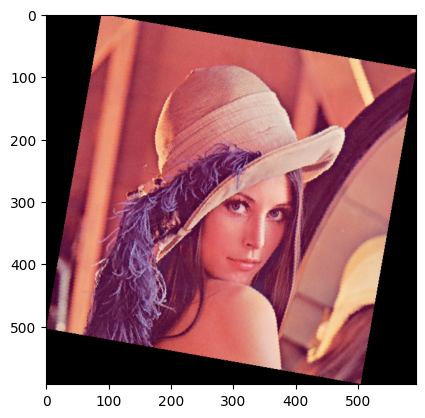

In [37]:
plt.imshow(rotate_image_acw(image))